# Data Transformation

### Import required libraries

In [2]:
from tqdm import tqdm
import os
import json
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import tensorflow_text as text  # A dependency of the preprocessing model
import tensorflow_addons as tfa
from official.nlp import optimization
import numpy as np

2023-04-19 15:14:11.721489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 15:14:12.423968: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 15:14:12.424994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 15:14:14.690279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/sylvas/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sylvas/anacon

In [3]:
 # Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk, time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
import collections, itertools

In [137]:
# Download these NLTK packages
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/sylvas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sylvas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sylvas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/sylvas/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/sylvas/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /home/sylvas/nltk_data...


True

### Load dataset

In [10]:
data = pd.read_csv('../datasets/sherloc/sherloc_court_cases_7.csv')

In [11]:
data.head()

,text,crime_types,sentence
0,Mr. Solomon Sauls ran an illegal enterprise wi...,money laundry,1
1,SummaryHarmony Gold Mine (Pty) Limited is a mi...,money laundry,1
2,SummaryThe three defendants were found guilty ...,money laundry,1
3,Johannes Erasmus van Staden was a Cape Town bu...,money laundry,1
4,Juan Hattingh was a young practicing attorney ...,money laundry,1


## Exploration of data

## Transformation

In [28]:
import warnings

In [48]:
start = time.time()
warnings.filterwarnings("ignore")
use_cols = ['text', 'lang']
# path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone3\\all_tweets.csv'
# data_iterator = pd.read_csv(path, usecols=use_cols, chunksize=50000)
data_iterator = data

chunk_list = []
for data_chunk in data_iterator:
    filtered_chunk = clean_up(data_chunk)
    chunk_list.append(filtered_chunk)
tidy_data = pd.concat(chunk_list)
end = time.time()
total=end-start
total

AttributeError: 'str' object has no attribute 'drop_duplicates'

#### Step 1: Sentence segmentation

In [20]:
# #import spacy library
# import spacy

# #load core english library
# nlp = spacy.load("en_core_web_sm")

# #take unicode string
# #here u stands for unicode
# doc = nlp(u"I Love Coding. Geeks for Geeks helped me in this regard very much. I Love Geeks for Geeks.")
# doc = nlp(data.text[0])
# #to print sentences
# for sent in doc.sents:
#     print(sent)


Mr. Solomon Sauls ran an illegal enterprise with the purpose of poaching and selling abalone (Haliotis midae) in South Africa.
A group of abalone divers worked under him supplying him with illegally harvested abalone.
The accused bribed officials from the Department of Agriculture, Forestry and Fisheries to prevent them from confiscating abalone and to buy back abalone already seized by the authorities.
The corrupt officials are facing charges in a separate trial.
In March 2018, the police searched the accused’s house and encountered cash that the accused confessed to proceeds of his illegal activities.
In February 2021, the defendant pleaded guilty to 41 counts involving running an illegal enterprise, corruption, money laundering and possessing and transporting illegally harvested abalone.
Factors aggravating the sentence were the seriousness of corrupting government officials, the engagement in the illegal abalone trade on a commercial scale and financial greed.
The accused has been 

In [22]:
doc = nltk.sent_tokenize(data.text[0])
#to print sentences
# doc
for sent in doc:
    print(sent)

['Mr. Solomon Sauls ran an illegal enterprise with the purpose of poaching and selling abalone (Haliotis midae) in South Africa.',
 'A group of abalone divers worked under him supplying him with illegally harvested abalone.',
 'The accused bribed officials from the Department of Agriculture, Forestry and Fisheries to prevent them from confiscating abalone and to buy back abalone already seized by the authorities.',
 'The corrupt officials are facing charges in a separate trial.In March 2018, the police searched the accused’s house and encountered cash that the accused confessed to proceeds of his illegal activities.',
 'In February 2021, the defendant pleaded guilty to 41 counts involving running an illegal enterprise, corruption, money laundering and possessing and transporting illegally harvested abalone.Factors aggravating the sentence were the seriousness of corrupting government officials, the engagement in the illegal abalone trade on a commercial scale and financial greed.The ac

#### Step 2: Word tokenization.
- drop duplicate and nan if any
- tokenize text
- transform text into lower case
- remove punctuatios
- remove stopword (step 5)

In [14]:
# Function to tokenize the tweets
def custom_tokenize(text):
    """Function that tokenizes text"""
    from nltk.tokenize import word_tokenize
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)

In [47]:
def clean_up(data):
    """Function that cleans up the data into a shape that can be further used for modeling"""
    # english = data[data['lang']=='en'] # extract only tweets in english language
    data.drop_duplicates() # drop duplicate tweets
    data['text'].dropna(inplace=True) # drop any rows with missing tweets
    tokenized = data['text'].apply(custom_tokenize) # Tokenize tweets
    lower_tokens = tokenized.apply(lambda x: [t.lower() for t in x]) # Convert tokens into lower case
    alpha_only = lower_tokens.apply(lambda x: [t for t in x if t.isalpha()]) # Remove punctuations
    no_stops = alpha_only.apply(lambda x: [t for t in x if t not in stopwords.words('english')]) # remove stop words
    # no_stops.apply(lambda x: [x.remove(t) for t in x if t=='rt']) # remove acronym "rt"
    return no_stops

In [62]:
cleaned_text_chunk = clean_up(data)

In [63]:
cleaned_text_chunk.shape

(1250,)

### Exploratory Data Analysis


In [72]:
cleaned_text_chunk.str.len().max()

2701

In [67]:
cleaned_text_chunk.str.len()

0       126
1       407
2       212
3       244
4       146
       ... 
1245     70
1246     14
1247     14
1248     28
1249    115
Name: text, Length: 1250, dtype: int64

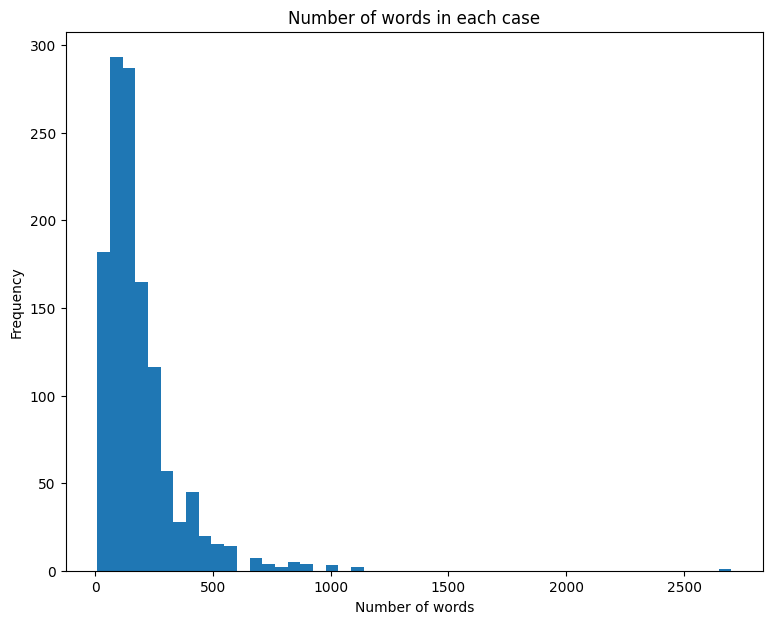

In [75]:
# Number of words in each tweet
_ = cleaned_text_chunk.str.len().hist(grid=False, figsize=(9,7), bins=50)
_ = plt.xlabel('Number of words')
_ = plt.ylabel('Frequency')
_ = plt.title('Number of words in each case')
plt.show()

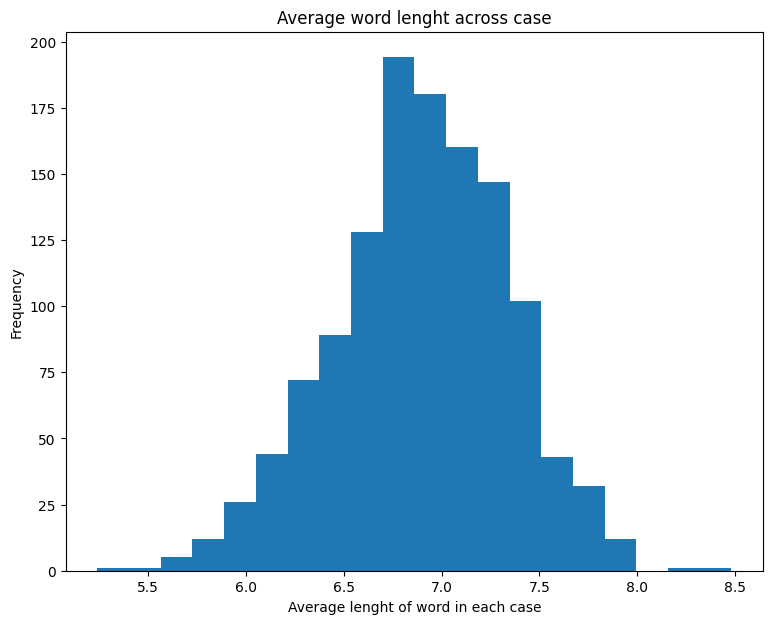

In [77]:
# let's check the average word lenght in each tweet
_ = cleaned_text_chunk.apply(lambda x: [len(word) for word in x]).apply(lambda y: np.mean(y)).hist(grid=False, bins=20, figsize=(9,7))
_ = plt.xlabel('Average lenght of word in each case')
_ = plt.ylabel('Frequency')
_ = plt.title('Average word lenght across case')
plt.show()

### Create bag of words with gensim

In [78]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary
# Create a Dictionary from the tweets
start = time.time()

dictionary = Dictionary(cleaned_text_chunk)

end = time.time()

total = end-start
total

0.3023958206176758

In [91]:
# save your dictionary as text file
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
dictionary.save_as_text(tmp_fname)
 
# load your dictionary text file
load_dict = corpora.Dictionary.load_from_text(tmp_fname)

In [92]:
tmp_fname

'/tmp/tmpv0mr26sg/dictionary'

In [94]:
# Create corpus for bag of words (token IDs of each word with their frequencies)
corpus = cleaned_text_chunk.apply(lambda x: dictionary.doc2bow(x))

0.21866464614868164

In [95]:
corpus

0       [(0, 8), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1...
1       [(3, 2), (6, 2), (12, 1), (15, 1), (32, 3), (3...
2       [(0, 6), (1, 1), (2, 1), (3, 1), (7, 4), (23, ...
3       [(1, 1), (12, 2), (15, 2), (23, 1), (29, 2), (...
4       [(15, 2), (23, 1), (31, 1), (44, 2), (51, 3), ...
                              ...                        
1245    [(1, 3), (26, 2), (43, 1), (58, 1), (70, 1), (...
1246    [(235, 1), (346, 1), (791, 1), (1521, 1), (176...
1247    [(1, 1), (26, 1), (48, 1), (58, 1), (70, 1), (...
1248    [(58, 1), (124, 1), (143, 1), (195, 1), (252, ...
1249    [(1, 1), (26, 3), (27, 1), (37, 3), (43, 2), (...
Name: text, Length: 1250, dtype: object

### Check the top 20 most frequent words in all of the case

In [97]:
import collections, itertools

total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id]+=word_count
    

In [103]:
total_word_count.values()

dict_values([24, 1147, 323, 81, 46, 6, 66, 353, 111, 513, 205, 5, 196, 85, 177, 181, 72, 9, 5, 2, 12, 1, 17, 150, 214, 23, 2924, 106, 101, 190, 5, 17, 17, 11, 96, 6, 224, 266, 5, 3, 2, 657, 195, 912, 375, 1, 53, 13, 374, 533, 109, 320, 343, 75, 57, 226, 212, 1, 978, 42, 7, 127, 7, 1078, 13, 39, 50, 103, 179, 171, 315, 46, 389, 153, 28, 55, 58, 2, 10, 57, 202, 56, 167, 382, 30, 53, 5, 68, 2, 144, 9, 93, 66, 170, 185, 629, 159, 260, 138, 74, 108, 16, 101, 247, 296, 86, 1, 96, 197, 65, 20, 1, 373, 176, 2, 10, 1, 6, 4, 186, 6, 9, 38, 102, 206, 40, 1, 6, 13, 1, 24, 44, 159, 36, 262, 27, 19, 328, 33, 21, 430, 1, 1241, 1728, 16, 105, 8, 106, 276, 32, 54, 49, 18, 246, 9, 14, 68, 1, 25, 79, 29, 79, 13, 102, 88, 481, 5, 7, 8, 141, 276, 71, 63, 77, 17, 26, 4, 41, 1, 120, 220, 52, 41, 110, 1, 2, 137, 1, 4, 86, 390, 27, 93, 219, 49, 171, 1, 1, 139, 19, 27, 29, 33, 41, 29, 1, 7, 26, 1, 454, 3, 61, 4, 88, 1, 233, 15, 130, 6, 26, 4, 21, 1, 71, 67, 15, 154, 48, 129, 86, 28, 15, 15, 173, 127, 1041, 19, 

In [104]:
# get the word from the dictionarybusing their ids
sorted_bow = sorted(total_word_count.items(), key=lambda kv :kv[1], reverse=True) #descending order
words = []
word_counts = []
for word_id, word_count in sorted_bow[:20]:
    words.append(dictionary.get(word_id)) 
    word_counts.append(word_count)
    

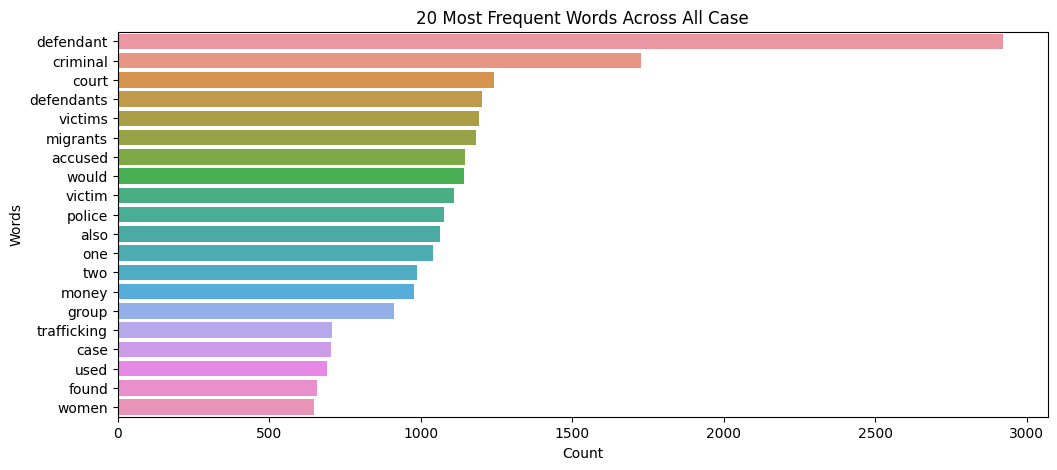

In [106]:
fig = plt.figure(figsize=(12,5))
fig = sns.barplot(x=word_counts, y=words)
fig = plt.xlabel("Count")
fig = plt.ylabel('Words')
fig = plt.title('20 Most Frequent Words Across All Case')
plt.show()

In [108]:
from nltk.util import ngrams

In [109]:
# 
bigrams = cleaned_text_chunk.apply(lambda x: ngrams(x,2))

In [118]:
bi_grams

0       [(solomon, sauls), (sauls, ran), (ran, illegal...
1       [(summaryharmony, gold), (gold, mine), (mine, ...
2       [(summarythe, three), (three, defendants), (de...
3       [(johannes, erasmus), (erasmus, van), (van, st...
4       [(juan, hattingh), (hattingh, young), (young, ...
                              ...                        
1245    [(number, victims), (victims, recruited), (rec...
1246    [(raped, juvenile), (juvenile, victims), (vict...
1247    [(defendant, accused), (accused, kidnapping), ...
1248    [(defendants, agreed), (agreed, third), (third...
1249    [(case, initiated), (initiated, following), (f...
Name: text, Length: 1250, dtype: object

In [110]:
bi_grams = bigrams.apply(lambda x: list(x))

In [111]:
top_20_bigrams = Counter(itertools.chain.from_iterable(bi_grams)).most_common(20)

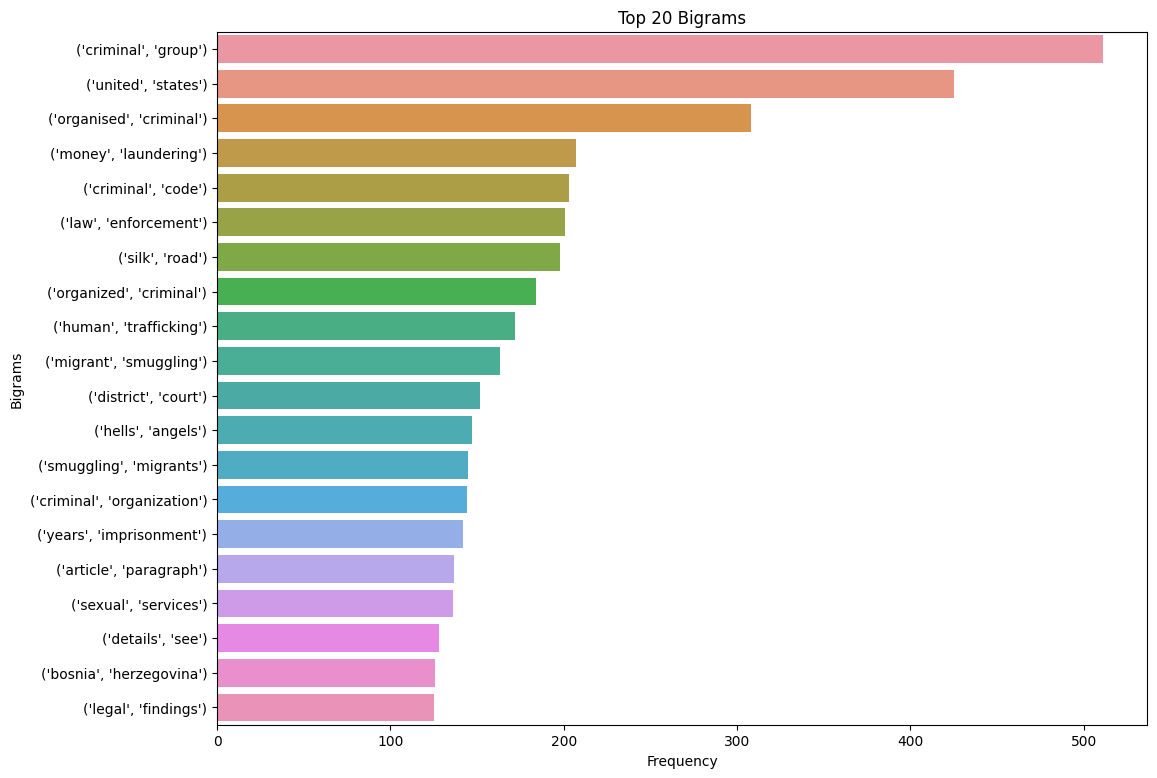

In [112]:
top_bigram = pd.DataFrame(top_20_bigrams, columns=['bigram', 'frequency'])
top_bigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_bigram.frequency, y=top_bigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Bigrams')
_ = plt.title('Top 20 Bigrams')
plt.show()

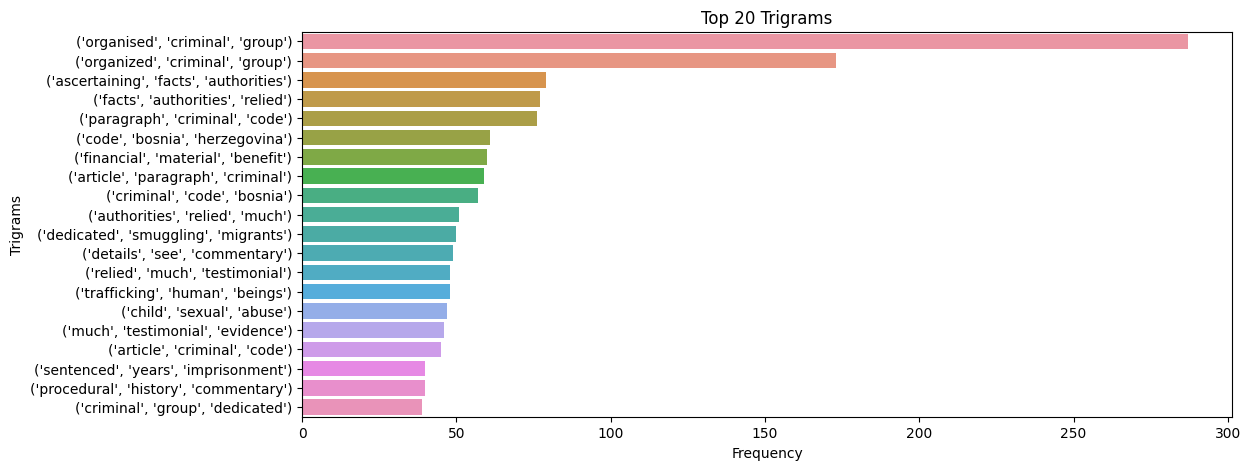

In [119]:
trigrams = cleaned_text_chunk.apply(lambda x: ngrams(x,3))
tri_grams = trigrams.apply(lambda x: list(x))
top_20_trigrams = Counter(itertools.chain.from_iterable(tri_grams)).most_common(20)
top_trigram = pd.DataFrame(top_20_trigrams, columns=['bigram', 'frequency'])
top_trigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,5))
_ = sns.barplot(x=top_trigram.frequency, y=top_trigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Trigrams')
_ = plt.title('Top 20 Trigrams')
plt.show()

In [120]:
data['crime_types'].value_counts()

crime_types
trafficking in persons                       296
smuggling of migrants                        191
other crimes                                 158
participation in organized criminal group    144
drug offences                                131
trafficking in firearms                      129
money laundry                                106
cybercrime                                    95
Name: count, dtype: int64

In [121]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

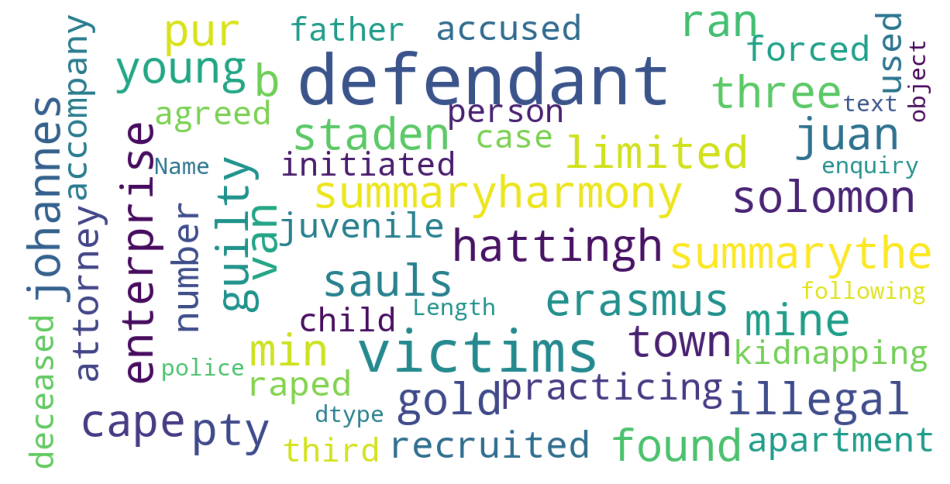

In [122]:
show_wordcloud(cleaned_text_chunk)

In [125]:
data.rename(columns={'text':'raw_text'}, inplace=True)
data.head(2)

AttributeError: 'NoneType' object has no attribute 'head'

In [127]:
df = pd.concat([data,cleaned_text_chunk],axis=1)
df.head(2)

,raw_text,crime_types,sentence,text
0,Mr. Solomon Sauls ran an illegal enterprise wi...,money laundry,1,"[solomon, sauls, ran, illegal, enterprise, pur..."
1,SummaryHarmony Gold Mine (Pty) Limited is a mi...,money laundry,1,"[summaryharmony, gold, mine, pty, limited, min..."


In [131]:
df.rename(columns={'text':'tokenized_cleaned_text'}, inplace=True)
df.head(2)


In [ ]:
# tidy_data.to_json(path, orient='table')
# tidy_tweets = pd.read_json(path, orient='table')
# tweets = tidy_tweets['text']


## Step 4: Lemmatization.

In [132]:
from nltk.corpus import wordnet

In [133]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [138]:
# Lemmatize tokens
start = time.time()

lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokenized_cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x])

end = time.time()
total = end-start
total

35.417070150375366

In [144]:
df.head()

,raw_text,crime_types,sentence,tokenized_cleaned_text,lemmatized
0,Mr. Solomon Sauls ran an illegal enterprise wi...,money laundry,1,"[solomon, sauls, ran, illegal, enterprise, pur...","[solomon, saul, ran, illegal, enterprise, purp..."
1,SummaryHarmony Gold Mine (Pty) Limited is a mi...,money laundry,1,"[summaryharmony, gold, mine, pty, limited, min...","[summaryharmony, gold, mine, pty, limited, min..."
2,SummaryThe three defendants were found guilty ...,money laundry,1,"[summarythe, three, defendants, found, guilty,...","[summarythe, three, defendant, found, guilty, ..."
3,Johannes Erasmus van Staden was a Cape Town bu...,money laundry,1,"[johannes, erasmus, van, staden, cape, town, b...","[johannes, erasmus, van, staden, cape, town, b..."
4,Juan Hattingh was a young practicing attorney ...,money laundry,1,"[juan, hattingh, young, practicing, attorney, ...","[juan, hattingh, young, practice, attorney, co..."


In [146]:
path = '../datasets/sherloc/sherloc_court_cases_lemmatized.json'
df.to_json(path, orient='table')

In [152]:
df.to_csv('../datasets/sherloc/sherloc_court_cases_lemmatized.csv')

In [7]:
# dff = pd.read_json(path, orient='table')
dff = pd.read_csv('../../../../datasets/sherloc/sherloc_court_cases_lemmatized.csv')
dff.head(2)

,Unnamed: 0,raw_text,crime_types,sentence,tokenized_cleaned_text,lemmatized,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,0,Mr. Solomon Sauls ran an illegal enterprise wi...,money,laundry,1,"['solomon', 'sauls', 'ran', 'illegal', 'enterp...","['solomon', 'saul', 'ran', 'illegal', 'enterpr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SummaryHarmony Gold Mine (Pty) Limited is a mi...,money,laundry,1,"['summaryharmony', 'gold', 'mine', 'pty', 'lim...","['summaryharmony', 'gold', 'mine', 'pty', 'lim...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# dff = dff.iloc[:,1:6]
# dff.head(2)

,raw_text,crime_types,sentence,tokenized_cleaned_text,lemmatized
0,Mr. Solomon Sauls ran an illegal enterprise wi...,money,laundry,1,"['solomon', 'sauls', 'ran', 'illegal', 'enterp..."
1,SummaryHarmony Gold Mine (Pty) Limited is a mi...,money,laundry,1,"['summaryharmony', 'gold', 'mine', 'pty', 'lim..."


In [9]:
# lemmatized text back to tokenized
import ast
# m= ast.literal_eval(f) # convert string to list just like json.loads()
dff['tokens_back_to_text'] = [' '.join(map(str, ast.literal_eval(l))) for l in dff['lemmatized']]
dff.head(2)

TypeError: 'int' object is not iterable

In [34]:
dff.to_csv('../datasets/sherloc/token_back_to_text.csv', index=False)